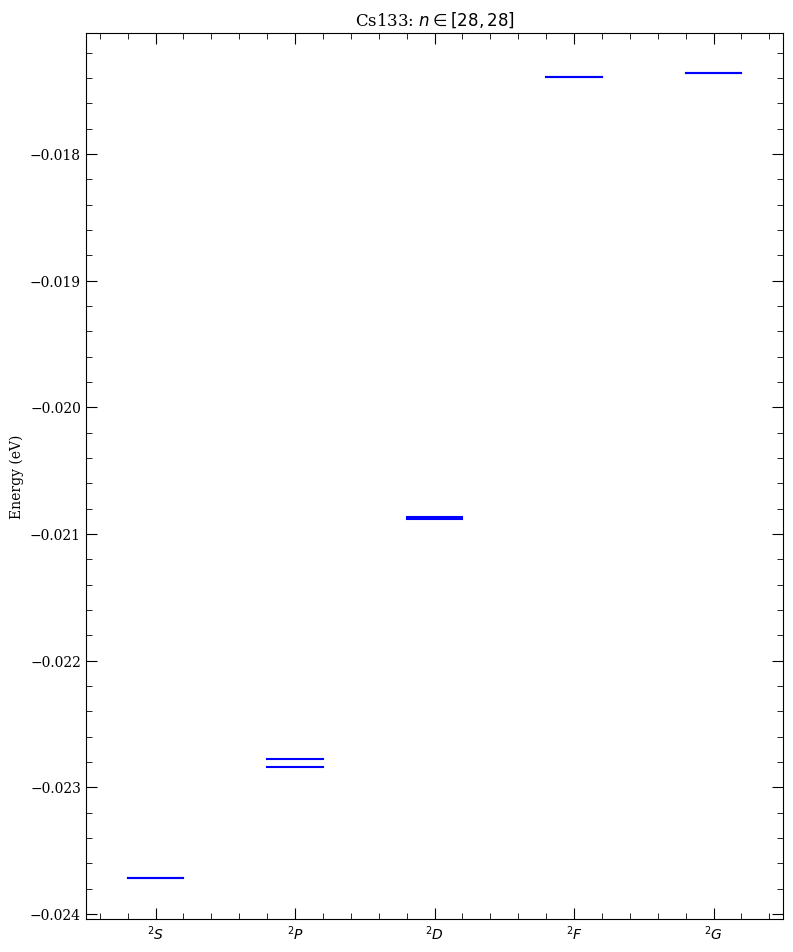

In [6]:
from arc import *


atom = Caesium() 
levels = LevelPlot(atom) 
# parameters: nmin, nmax, lmin, lmax 
levels.makeLevels(28,28,0,4) 
levels.drawLevels()
levels.showPlot()

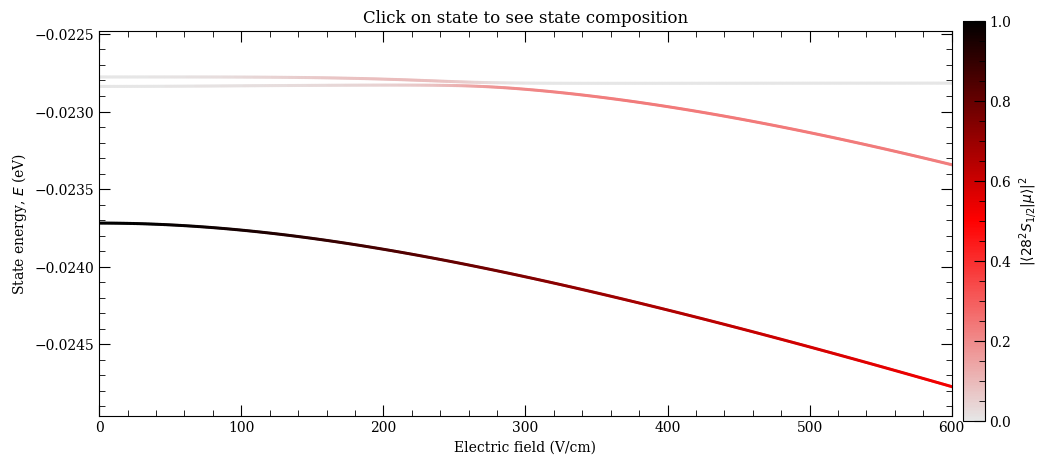

1.45601 MHz cm^2 / V^2


In [30]:
import numpy as np
from arc import *

calc = StarkMap(Caesium())
# parameters: n, l, j, mj, nmin, nmax, lmax
calc.defineBasis(28, 0, 0.5, 0.5, 28, 30, 1)

# 전기장 리스트 (V/m). 600 V/cm = 600*1e2 V/m
E = np.linspace(0., 600*1e2, 600)

# 1) 일반 Stark 다이어그람 계산 및 플롯
calc.diagonalise(E)  # drivingFromState 사용하지 않음
calc.plotLevelDiagram(units='eV', highlightState=True)
calc.showPlot()

# 2) (선택) 구동 상태를 지정한 계산이 필요하면 여기서 별도로 수행
calc.diagonalise(np.linspace(0., 6000, 600), drivingFromState=[7, 0, 0.5, -0.5, +1])
# ...여기서 필요한 분석/플롯을 하세요...

# 3) 극화율 계산을 위해 다시 "원래 상태" 컨텍스트로 복귀
calc.diagonalise(E)  # drivingFromState 없이 호출해야 함
alpha = calc.getPolarizability()
print(f"{alpha:.5f} MHz cm^2 / V^2")

In [33]:
import numpy as np
from arc import *
import math

calc = PairStateInteractions (Rubidium(), 60, 0, 0.5, 60, 0, 0.5, 0.5, -0.5) # parameters: theta, phi, deltan, deltaE
c6 = calc.getC6perturbatively(math.pi/6, 0, 5, 25.e9)
print("C_6 = %.0f GHz (mu m)^6" % c6)

C_6 = -140 GHz (mu m)^6


자발방출 vs BBR 계산

In [ ]:
from arc import *
Cs = Caesium()

# 단일 전이 채널 전이율
A_0K   = Cs.getTransitionRate(14,1,1.5, 13,2,2.5, temperature=0.0)     # 자발방출만
A_300K = Cs.getTransitionRate(14,1,1.5, 13,2,2.5, temperature=300.0)   # 300K에서 BBR 포함
print(A_0K, A_300K)
